In [1]:
import pandas as pd
import numpy as np

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Activation
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# tag list
tag_file=pd.read_csv("tags.csv")
tag=tag_file["tagID"]
tag=list(tag)

# user_code
user_tag_file=pd.read_csv("user_tags.csv")
company_tag_file=pd.read_csv("job_tags.csv")

# user_code 작성
list_of_user=list(set(user_tag_file["userID"]))
user_code={}
for user in list_of_user:
    user_code[user]=[0 for i in range(887)]

sizeOfUserTag=len(user_tag_file)
for i in range(sizeOfUserTag):
    tag_id_of_user=user_tag_file["tagID"][i]
    index_of_tag_user=tag.index(tag_id_of_user)  
    user_code[user_tag_file["userID"][i]][index_of_tag_user]=1
    
# company_code 작성
list_of_company=list(set(company_tag_file["jobID"]))    
company_code={}
for company in list_of_company:
    company_code[company]=[0 for i in range(887)]

sizeOfCompanyTag=len(company_tag_file)
for i in range(sizeOfCompanyTag):
    tag_id_of_company=company_tag_file["tagID"][i]
    index_of_tag_company=tag.index(tag_id_of_company)
    company_code[company_tag_file["jobID"][i]][index_of_tag_company]=1
    
#d company_size 작성
job_file=pd.read_csv("job_companies.csv")

# [nan, '51-100', '101-200', '11-50', '201-500', '501-1000', '1000 이상', '1-10']
sizeList=list(set(job_file["companySize"])) 

company_size={}
sizeOfCompanySize=len(job_file)
for i in range(sizeOfCompanySize):
    company_size[job_file["jobID"][i]]=[0 for _ in range(8)]
    comSize=job_file["companySize"][i]
    company_size[job_file["jobID"][i]][sizeList.index(comSize)]=1

In [3]:
train_file=pd.read_csv("train.csv")
size_input=len(train_file)
X_train=[]
y_train=[]

for i in range(size_input):
    userL=user_code[train_file["userID"][i]]
    companyL=company_code[train_file["jobID"][i]]
    tempL=[]
    for j in range(887):
        if userL[j]==1 and companyL[j]==1:
            tempL.append(0.9)
        elif userL[j]==1 and companyL[j]==0:
            tempL.append(0.5)
        elif userL[j]==0 and companyL[j]==1:
            tempL.append(0.3)
        else:
            tempL.append(0.1)
    tempL.extend(company_size[train_file["jobID"][i]])
    X_train.append(tempL)
    y_train.append([train_file["applied"][i]])
    
X_train=np.array(X_train)
y_train=np.array(y_train)

In [4]:
def my_model(X_train,Y_train,x_degree):
    input_X = keras.Input(shape=(x_degree,),name="input_layer")
    output_model = layers.Dense(32, activation='relu',name="hidden_layer1")(input_X)
    #output_model = layers.Dense(32, activation='relu',name="hidden_layer2")(output_model)
    output_model = layers.Dense(1, activation='sigmoid',name="output_layer")(output_model)

    model = keras.Model(inputs=input_X,
                        outputs=output_model)

    model.compile(optimizer="rmsprop",
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # starts training
    hist=model.fit(X_train,Y_train,
                   batch_size=20,
                   validation_split=0.3,
                   epochs=300,
                   verbose=1,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)],
                   shuffle=True)
    
    return hist,model

def model_summary(model):
    model.summary()
    
def grapviz(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    return plt.show()


In [5]:
hist,model=my_model(X_train,y_train,len(X_train[0]))

Train on 4200 samples, validate on 1800 samples
Epoch 1/300
4200/4200 [==============================] - 1s 283us/sample - loss: 0.4201 - accuracy: 0.8545 - val_loss: 0.3990 - val_accuracy: 0.8622
Epoch 2/300
4200/4200 [==============================] - 0s 91us/sample - loss: 0.4135 - accuracy: 0.8550 - val_loss: 0.3979 - val_accuracy: 0.8622
Epoch 3/300
4200/4200 [==============================] - 0s 89us/sample - loss: 0.4083 - accuracy: 0.8550 - val_loss: 0.3982 - val_accuracy: 0.8622
Epoch 4/300
4200/4200 [==============================] - 0s 91us/sample - loss: 0.4067 - accuracy: 0.8550 - val_loss: 0.3934 - val_accuracy: 0.8622
Epoch 5/300
4200/4200 [==============================] - 0s 91us/sample - loss: 0.4021 - accuracy: 0.8550 - val_loss: 0.3912 - val_accuracy: 0.8622
Epoch 6/300
4200/4200 [==============================] - 0s 95us/sample - loss: 0.4019 - accuracy: 0.8550 - val_loss: 0.4137 - val_accuracy: 0.8622
Epoch 7/300
4200/4200 [==============================] - 0s 90u

Epoch 56/300
4200/4200 [==============================] - 0s 86us/sample - loss: 0.3695 - accuracy: 0.8633 - val_loss: 0.4020 - val_accuracy: 0.8628
Epoch 57/300
4200/4200 [==============================] - 0s 88us/sample - loss: 0.3677 - accuracy: 0.8605 - val_loss: 0.3943 - val_accuracy: 0.8606
Epoch 58/300
4200/4200 [==============================] - 0s 91us/sample - loss: 0.3659 - accuracy: 0.8600 - val_loss: 0.3896 - val_accuracy: 0.8633
Epoch 59/300
4200/4200 [==============================] - 0s 90us/sample - loss: 0.3671 - accuracy: 0.8626 - val_loss: 0.3897 - val_accuracy: 0.8644
Epoch 60/300
4200/4200 [==============================] - 0s 88us/sample - loss: 0.3662 - accuracy: 0.8636 - val_loss: 0.3972 - val_accuracy: 0.8639
Epoch 61/300
4200/4200 [==============================] - 0s 85us/sample - loss: 0.3680 - accuracy: 0.8624 - val_loss: 0.4192 - val_accuracy: 0.8639
Epoch 62/300
4200/4200 [==============================] - 0s 88us/sample - loss: 0.3651 - accuracy: 0.8643

Epoch 111/300
4200/4200 [==============================] - 0s 88us/sample - loss: 0.3497 - accuracy: 0.8643 - val_loss: 0.4054 - val_accuracy: 0.8561
Epoch 112/300
4200/4200 [==============================] - 0s 91us/sample - loss: 0.3488 - accuracy: 0.8674 - val_loss: 0.4053 - val_accuracy: 0.8606
Epoch 113/300
4200/4200 [==============================] - 0s 86us/sample - loss: 0.3496 - accuracy: 0.8664 - val_loss: 0.4074 - val_accuracy: 0.8594
Epoch 114/300
4200/4200 [==============================] - 0s 90us/sample - loss: 0.3504 - accuracy: 0.8671 - val_loss: 0.3992 - val_accuracy: 0.8639
Epoch 115/300
4200/4200 [==============================] - 0s 85us/sample - loss: 0.3478 - accuracy: 0.8671 - val_loss: 0.4129 - val_accuracy: 0.8639
Epoch 116/300
4200/4200 [==============================] - 0s 84us/sample - loss: 0.3485 - accuracy: 0.8643 - val_loss: 0.3973 - val_accuracy: 0.8639
Epoch 117/300
4200/4200 [==============================] - 0s 86us/sample - loss: 0.3473 - accuracy:

4200/4200 [==============================] - 0s 91us/sample - loss: 0.3330 - accuracy: 0.8702 - val_loss: 0.4226 - val_accuracy: 0.8628
Epoch 166/300
4200/4200 [==============================] - 0s 87us/sample - loss: 0.3301 - accuracy: 0.8698 - val_loss: 0.4164 - val_accuracy: 0.8550
Epoch 167/300
4200/4200 [==============================] - 0s 84us/sample - loss: 0.3328 - accuracy: 0.8686 - val_loss: 0.4082 - val_accuracy: 0.8467
Epoch 168/300
4200/4200 [==============================] - 0s 83us/sample - loss: 0.3323 - accuracy: 0.8714 - val_loss: 0.4279 - val_accuracy: 0.8628
Epoch 169/300
4200/4200 [==============================] - 0s 91us/sample - loss: 0.3347 - accuracy: 0.8712 - val_loss: 0.4275 - val_accuracy: 0.8633
Epoch 170/300
4200/4200 [==============================] - 0s 89us/sample - loss: 0.3322 - accuracy: 0.8755 - val_loss: 0.4181 - val_accuracy: 0.8611
Epoch 171/300
4200/4200 [==============================] - 0s 89us/sample - loss: 0.3320 - accuracy: 0.8729 - val_

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 895)]             0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                28672     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 28,705
Trainable params: 28,705
Non-trainable params: 0
_________________________________________________________________


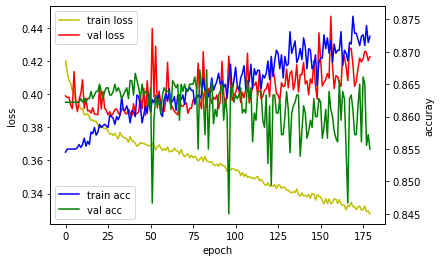

In [6]:
model_summary(model)
grapviz(hist)

In [7]:
'''
#validation set

score = model.evaluate(X_train[5000:], y_train[5000:])
print('test_loss: ', score[0])
print('test_acc: ', score[1])
'''


"\n#validation set\n\nscore = model.evaluate(X_train[5000:], y_train[5000:])\nprint('test_loss: ', score[0])\nprint('test_acc: ', score[1])\n"

In [8]:
model.save("donghyun_model2.h5")

In [9]:
# x_test 입력
test_file=pd.read_csv("test_job.csv")
size_input_test=len(test_file)
X_test=[]

for i in range(size_input_test):
    userL=user_code[test_file["userID"][i]]
    companyL=company_code[test_file["jobID"][i]]
    tempL=[]
    for j in range(887):
        if userL[j]==1 and companyL[j]==1:
            tempL.append(0.7)
        elif userL[j]==1 and companyL[j]==0:
            tempL.append(0.5)
        elif userL[j]==0 and companyL[j]==1:
            tempL.append(0.3)
        else:
            tempL.append(0.1)

    tempL.extend(company_size[test_file["jobID"][i]])
    X_test.append(tempL)
    
X_test=np.array(X_test)

In [10]:
# y 예측값 입력
y_prob=model.predict(X_test)
y_class=[]
for i in range(len(y_prob)):
    if y_prob[i][0]>=0.5:
        y_class.append(1)
    else:
        y_class.append(0)
print(y_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
# test 결과 저장
df=pd.DataFrame(data=y_class,columns=['applied'])
df.to_csv("result.csv",mode='w',index=False)